# Lab07 K-means Clustering

## 1 - Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline

## 2 - Dataset

In [3]:
# Load the dataset

def load_data():
    X = np.load('X.npy')
    return X


X = load_data()

## 3 - Finding Closest Centroids

The task is to complete the code in `find_closest_centroids` .

- This function takes the data matrix `X` and the locations of all centroids inside `centroids` .
- It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index of the closest centroid (a value in $\{0,...,K-1\}$, where $K$ is total number of centroids) to every training example. _(Note: The index range 0 to K-1 varies slightly from what is shown in the lectures (i.e. 1 to K) because Python list indices start at 0 instead of 1.)_
- Specifically, for every example $x^{(i)}$ we set $$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2$$ where
  - $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and
  - $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)
  - $||x^{(i)} - \mu_j||$ is the L2-norm.

In [4]:
def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example.

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) Centroids

    Returns:
        idx (array_like): (m,) Closest centroids
    """

    K = centroids.shape[0]

    n = X.shape[0]

    idx = np.zeros(n, dtype=int)

    for i in range(n):
        distance = []

        for j in range(K):
            norm_ij = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm_ij)

        idx[i] = np.argmin(distance)

    return idx

## 4 - Computing Centroid Means

Complete the `compute_centroids` below to recompute the value for each centroid.

- Specifically, for every centroid $\mu_k$ we set $$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ where
  - $C_k$ is the set of examples that are assigned to centroid $k$.
  - $|C_k|$ is the number of examples in the set $C_k$.
- Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$, then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [5]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the data points assigned to each centroid.

    Args:
        X (ndarray): (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each example in X. Concretely, idx[i] contains the index of the centroid closest to example i
        K (int): Number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """

    n = X.shape[1]

    centroids = np.zeros((K, n))

    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)

    return centroids

## 5 - K-means on a Sample Dataset

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


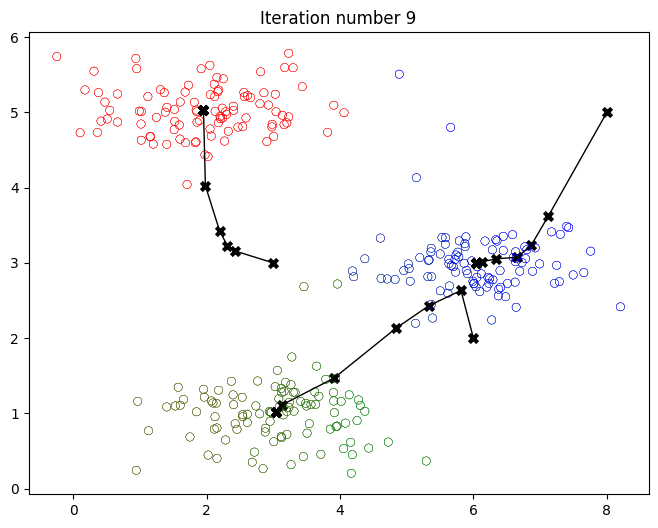

In [6]:
def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-means algorithm on data matrix X, where each row of X is a single example.
    """

    # Initialize values
    m = X.shape[0]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-means
    for i in range(max_iters):
        print('K-Means iteration %d/%d' % (i, max_iters - 1))
        idx = find_closest_centroids(X, centroids)

        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids

        centroids = compute_centroids(X, idx, K)

    plt.show()

    return centroids, idx


# Set initial centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Number of iterations
max_iters = 10

# Run K-means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 6 - Random Initialization

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


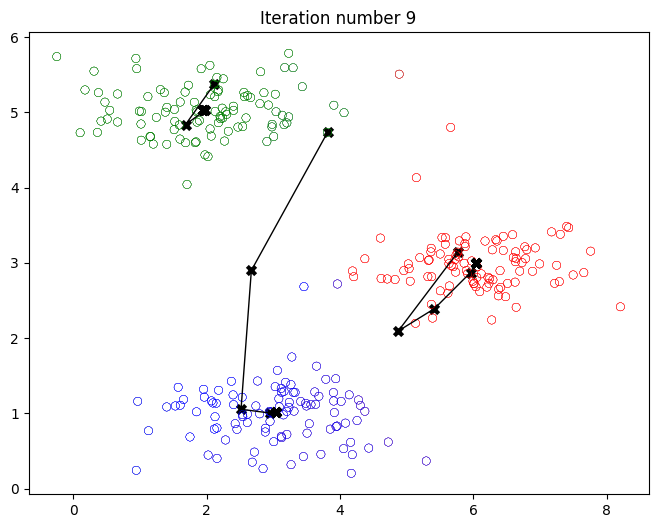

In [8]:
def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be used in K-means on the dataset X.
    """

    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]

    return centroids


# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

## 7 - Image Compression with K-means

In this part, you will apply K-means to image compression.

- In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
- Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of colors to 16 colors.
- By making this reduction, it is possible to represent (compress) the photo in an efficient way.
- Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.

- Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space.
- Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

Shape of original image is: (128, 128, 3)


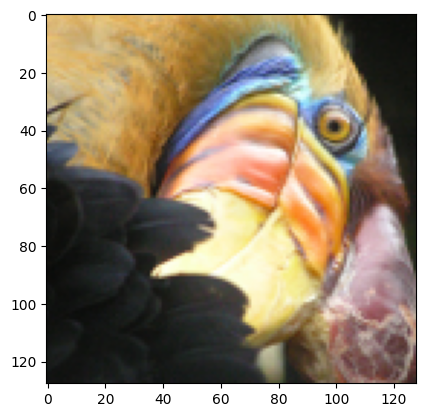

In [9]:
# Load the image of a bird
original_img = plt.imread('bird.png')

# Visualize the image
plt.imshow(original_img)

# Check the dimension of the variable
print('Shape of original image is:', original_img.shape)

The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where $m=16384 = 128\times128$).

In [10]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

Run the cell below to run K-means on the pre-processed image.

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

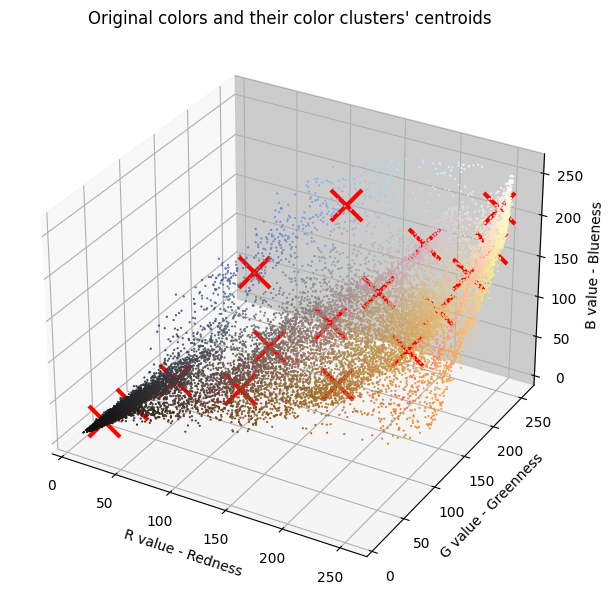

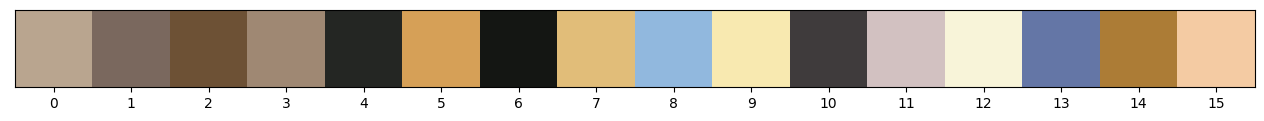

In [11]:
# Run K-means algorithm
K = 16
max_iters = 10
initial_centroids = kMeans_init_centroids(X_img, K)
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

# Plot the colors of the image and mark the centroids
plot_kMeans_RGB(X_img, centroids, idx, K)

# Visualize the 16 colors selected
show_centroid_colors(centroids)

After finding the top $K=16$ colors to represent the image, you can now assign each pixel position to its closest centroid using the `find_closest_centroids` function.

- This allows you to represent the original image using the centroid assignments of each pixel.
- Notice that you have significantly reduced the number of bits that are required to describe the image.
  - The original image required 24 bits (i.e. 8 bits x 3 channels in RGB encoding) for each one of the $128\times128$ pixel locations, resulting in total size of $128 \times 128 \times 24 = 393,216$ bits.
  - The new representation requires some overhead storage in form of a dictionary of 16 colors, each of which require 24 bits, but the image itself then only requires 4 bits per pixel location.
  - The final number of bits used is therefore $16 \times 24 + 128 \times 128 \times 4 = 65,920$ bits, which corresponds to compressing the original image by about a factor of 6.

Run the code below to see how the image is reconstructed using the 16 colors selected earlier.

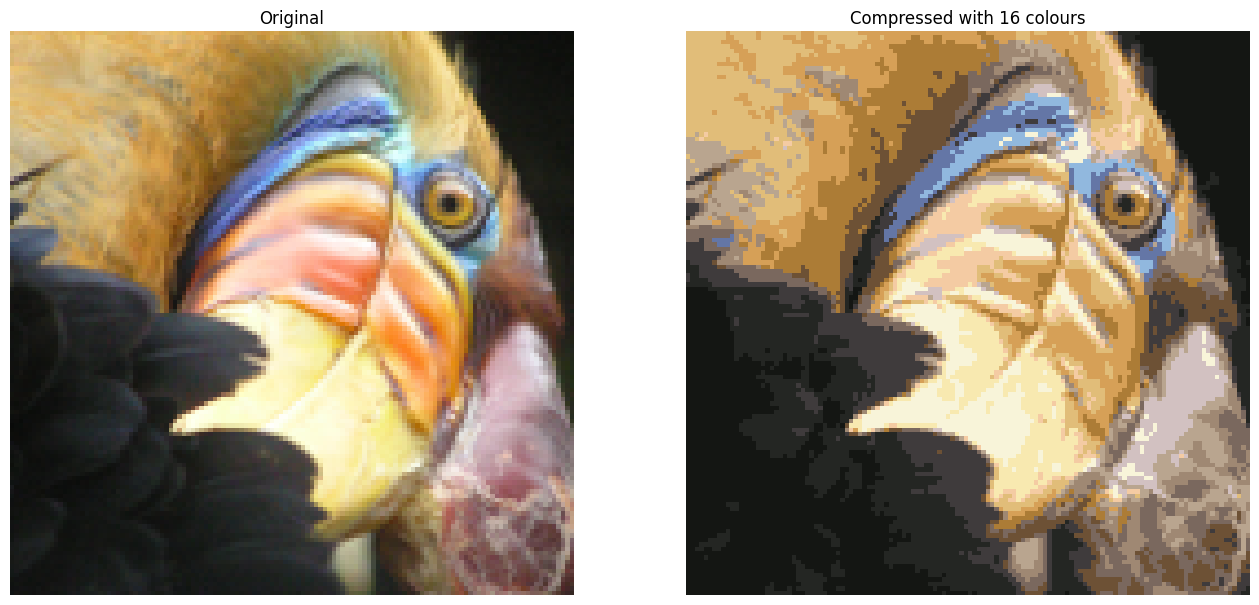

In [12]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :]

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

# Display original image
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
plt.axis('off')
ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours' % K)
ax[1].set_axis_off()